In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pydataset import data
from scipy import stats

# Chi$^$2(x$^$2) Test for Independence
aka Pearson's Chi$^2$ test. Pronounced as 'Ki' as in kite.

- Lets us test the hypothesis that one group is independent of another
- $H_0$ is always that there is independence between the groups
- $H_0$ is that there is no dependence

The null hypothesis assumes that the observed frequencies for a categorical variable match the expected frequencies for the categorical variable

## The Quick Way To Run a Chi$^2$ Test¶

In [34]:
# get data from pydataset
df = data('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


- $H_0$ There is independence between the smoker and time of the day
    - lunch
    - dinner
- $H_a$ is that there is a dependence

In [37]:
# you can make a crosstab
observe = pd.crosstab(df.time, df.smoker, margins = True) 
    #margins = True will ad a collumn counting both the yes and no and a row counting all dinner and lunch
observe

smoker,No,Yes,All
time,,,
Dinner,106,70,176
Lunch,45,23,68
All,151,93,244


In [38]:
observe = pd.crosstab(df.time, df.smoker, margins = True, normalize = 'columns') 
    #normalize = ______ shows you the expected values as percents (decimal percent so .70 = 70%)
observe

smoker,No,Yes,All
time,,,
Dinner,0.701987,0.752688,0.721311
Lunch,0.298013,0.247312,0.278689


In [39]:
# Set our alpha
alpha = .01

In [41]:
# chi2_contingency returns 4 different values
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p, degf, expected 

(0.5053733928754355,
 0.4771485672079724,
 1,
 array([[108.91803279,  67.08196721],
        [ 42.08196721,  25.91803279]]))

In [42]:
if p < alpha:
    print("We reject the null")
else:
    print("We fail to reject the null")

We fail to reject the null


# Attrition Data

In [107]:
# get your data
df = pd.read_csv("https://gist.githubusercontent.com/ryanorsinger/6ba2dd985c9aa92f5598fc0f7c359f6a/raw/b20a508cee46e6ac69eb1e228b167d6f42d665d8/attrition.csv")

In [108]:

df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


In [110]:
# check shape of the dataframe
df.shape()

TypeError: 'tuple' object is not callable

In [47]:
# Check for which columns are discrete

In [ ]:
# Question we want to answer:

# 1. Is Attrition independent from Business Travel amount?
# 2. Is Attrition independent from Department?
# 3. Is Attrition indpendent from WorkLife balance

In [48]:
df.BusinessTravel.value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

Form hypothesis:

$H_0$: Attrition and Travel Frequency are independent (not dependent)

$H_a$: Attrition and Travel Frequency are dependent

In [53]:
# cross tab Attrition vs Business Travel
observed = pd.crosstab(df.Attrition, df.BusinessTravel)

In [54]:
observed

BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely
Attrition,,,
No,138,208,887
Yes,12,69,156


In [55]:
# Set our alpha
alpha = .01

In [58]:
# .chi2_contingency returns 4 different values
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p, degf

(24.182413685655174, 5.608614476449931e-06, 2)

In [59]:
expected #combare to observe

array([[125.81632653, 232.34081633, 874.84285714],
       [ 24.18367347,  44.65918367, 168.15714286]])

In [60]:
null_hypothesis = "Attrition and Business Travel are independent"

if p < alpha:
    print("We reject the null hypothesis")
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

print(p)

We reject the null hypothesis
We reject the hypothesis that Attrition and Business Travel are independent
5.608614476449931e-06


In [64]:
#Normalized crosstab
observe = pd.crosstab(df.Attrition, df.BusinessTravel, normalize = "columns")
observe

BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely
Attrition,,,
No,0.92,0.750903,0.850431
Yes,0.08,0.249097,0.149569


In [ ]:
# make a heatmap

# Let's Test for Independence of Attrition and Deparment
- $H_0$: There is no relationship between them, Attrition and Deparment are independent
- $H_a$: There is a relationship

In [74]:
#crosstab for observed values between Attrition and Depts

In [75]:
# Let's get the p value from a chi2 test for independence
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [76]:
if p < alpha:
    print("We reject the null")
else:
    print("We fail to reject the null")

We reject the null


In [77]:
# Is attrition and being in sales related?

In [78]:
df["in_sales"] = df.Department == "Sales"

In [79]:
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,in_sales
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,True
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,False


In [80]:
# crosstab between Attrition and in_sales column
observed = pd.crosstab(df.Attrition, df.in_sales)
observed

in_sales,False,True
Attrition,,
No,879,354
Yes,145,92


$H_0$: Attrition and Being in Sales or Not are independent

$H_a$: There is a relationship

In [81]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("We reject the null")
else:
    print("We fail to reject the null")

p

We reject the null


0.0025036788527795267

# Let's test for independence between WorkLifeBalance and Attrition
- $H_0$: WorkLifeBalance and Attrition are independent, no relationship
- $H_a$: They are dependent - there is a relationship
WorkLifeBalance

These are what the numbers stand for when it comes down to work life balance
1. 'Bad'
2. 'Good'
3. 'Better'
4. 'Best'

In [82]:
#look at value counts
df.WorkLifeBalance.value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

In [84]:

# Crosstab for Attrition and WorklifeBalance
observed = pd.crosstab(df.Attrition, df.WorkLifeBalance)
observed

WorkLifeBalance,1,2,3,4
Attrition,,,,
No,55,286,766,126
Yes,25,58,127,27


In [85]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null")

We reject the null hypothesis


In [86]:
p

0.0009725698845348824

In [88]:
# Now, let's control for Department
df.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [89]:
# df.Department.value_counts()


In [91]:
# make new dataframes for each dept
r_n_d = df[df.Department == 'Research & Development']
sales = df[df.Department == 'Sales']
hr = df[df.Department == "Human Resources"]
r_n_d.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,in_sales
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,False
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,False
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,False
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,False
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,80,0,8,2,2,7,7,3,6,False


In [103]:
# Run the chi squared test for independence on only RND
observed = pd.crosstab(r_n_d.Attrition, r_n_d.WorkLifeBalance)
observed

WorkLifeBalance,1,2,3,4
Attrition,,,,
No,41,203,507,77
Yes,19,32,68,14


In [104]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null")
p

We reject the null hypothesis


0.0004119601633396577

In [105]:
expected

array([[ 51.69614984, 202.47658689, 495.421436  ,  78.40582726],
       [  8.30385016,  32.52341311,  79.578564  ,  12.59417274]])

In [100]:
# how about for sales?
observed = pd.crosstab(sales.Attrition, sales.WorkLifeBalance)
observed

WorkLifeBalance,1,2,3,4
Attrition,,,,
No,10,78,226,40
Yes,6,24,50,12


In [101]:

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null")
p

We fail to reject the null


0.20695513054029363

In [102]:
expected

array([[ 12.69955157,  80.95964126, 219.06726457,  41.2735426 ],
       [  3.30044843,  21.04035874,  56.93273543,  10.7264574 ]])

In [97]:
# How about for HR?
observed = pd.crosstab(hr.Attrition, hr.WorkLifeBalance)
observed

WorkLifeBalance,1,2,3,4
Attrition,,,,
No,4,5,33,9
Yes,0,2,9,1


In [98]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null")
p

We fail to reject the null


0.5645088718158451

In [99]:
expected

array([[ 3.23809524,  5.66666667, 34.        ,  8.0952381 ],
       [ 0.76190476,  1.33333333,  8.        ,  1.9047619 ]])

# Findings So Far:
$H_0$ is that there is no relationship. Overall Worklife and Attrition are indpendent

- Research and Development, we reject the null hypothesis
- Sales, we fail to reject the null. This could be due to small population size.
- HR, we fail to reject the null. This could be due to small population size

# Comparing Group Membership
The χ2 test can be used to compare two categorical variables and helps us answer questions like:

- Is whether or not a customer churns independent of their subscription plan?
- Are doctors less likely to smoke?
- Does playing on the home field give a soccer team an advantage?


# The χ2 Contingency Table Test
The χ2 test can be also be used in several other ways, but we will use what is referred to as the contingency table test, which lets us test the hypothesis that one group is indenpendent of another. To do this, we will

1. Calculate the theoretical expected values
2. Find the actual observed values
3. Calculate a test-statistic and p-vale based on the two tables above

Specifically, our test-statistic, χ2 is given by:

            χ2=∑(O−E)^2/E

Where O is the observed values, and E is the expected values.

For this example, we will look at the dataset on cars that we explored previously.



In [12]:
import pandas as pd
from scipy import stats
from pydataset import data

mpg = data('mpg')
mpg['transmission'] = mpg.trans.str[:-4] # a little cleaning goes a long way
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,transmission
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,auto
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,manual
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,manual
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,auto
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,auto


We will investigate the question of whether the cars drive is independent of transmission type.

H0: drive is independent of transmission type

### Calculating Expected Proportions
To begin with, we will calculate the values we would expect to see if the two groups are independent.

For each subgroup, we calculate the proportion of the total that it is, then multiply each subgroups proportion by the proportion from every other subgroup to determine the expected values.

To start with, we'll calculate the proportions for transmission type:



In [13]:
n = mpg.shape[0]

transmission_proportions = mpg.transmission.value_counts() / n
transmission_proportions

auto      0.67094
manual    0.32906
Name: transmission, dtype: float64

This tells us that cars with automatic transmissions make up ~ 67% of the total, and cars with manual transmissions make up ~ 33% of the total.

Now we'll do the same for drive types.



In [14]:
drive_proportions = mpg.drv.value_counts() / n
drive_proportions

f    0.452991
4    0.440171
r    0.106838
Name: drv, dtype: float64

To find the overall proportions, we multiply all the combinations of proportions together.

For example, to find the expected proportion of automatic drive cars with 4-wheel drive, we would multiply those two proportions together.

        .67∗.44=.2984

So we would expect about 29.84% of the total cars to be automatic and 4-wheel drive.



Below we show some code that will loop through all of the proportions and perform this calculation for all combinations of groups.

In [15]:
expected = pd.DataFrame()

for transmission_group, t_prop in transmission_proportions.iteritems():
    for drive_group, d_prop in drive_proportions.iteritems():
        expected.loc[drive_group, transmission_group] = t_prop * d_prop

expected.sort_index(inplace=True)
expected

,auto,manual
4,0.295328,0.144843
f,0.303930,0.149061
r,0.071682,0.035156


If we wanted to convert these proportions to expected number of values, we can multiply by the total number of observations:



In [16]:
expected *= n
expected

,auto,manual
4,69.106838,33.893162
f,71.119658,34.880342
r,16.773504,8.226496


Now we have the expected proportions, we need to calculate the actual proportions so that we can compare them. to do this, we'll use the `crosstab` function from pandas.

In [17]:
observed = pd.crosstab(mpg.drv, mpg.transmission)
observed

transmission,auto,manual
drv,,
4,75,28
f,65,41
r,17,8


Now we can calculate our test statistic, χ^2

In [18]:
chi2 = ((observed - expected)**2 / expected).values.sum()
chi2

3.136769245971112

We also need to find our degrees of freedom for the distribution. The degrees of freedom are given by:

            (nrows−1)×(ncols−1)

Where nrows and ncols are the number of rows and columns in our contingency table.

In [19]:
nrows, ncols = observed.shape

degrees_of_freedom = (nrows - 1) * (ncols - 1)

Now, based on the test statistic and degrees of freedom, we could lookup the corresponding p-value from a pre-calculated table, or use scipy's chi2 distribution.

In [20]:
stats.chi2(degrees_of_freedom).sf(chi2)

0.20838152534979645

With this high of a p-value, we fail to reject our null hypothesis.

## Another Example

Suppose we have the following contingency table:
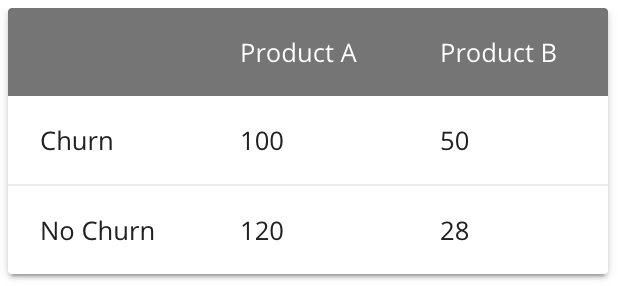

And we want to know if a customer churning is independent of which product offering they have.

We have all the information that we need to run a χ2 test, because we can calculate the population proportions from the above table.

1. Find the proportions for Product A, Product B, Churn, and No Churn

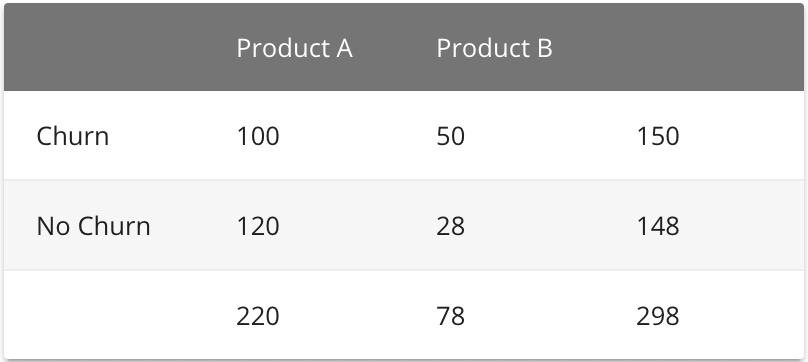

2. Calculate the proportions

- Product A = 220 / 298 = .738
- Product B = 78 / 298 = .262
- Churn = 150 / 298 = .503
- No churn = 148 / 298 = .497

3. Multiply these together to produce a contingency table of expected values

First we calculate proportions:

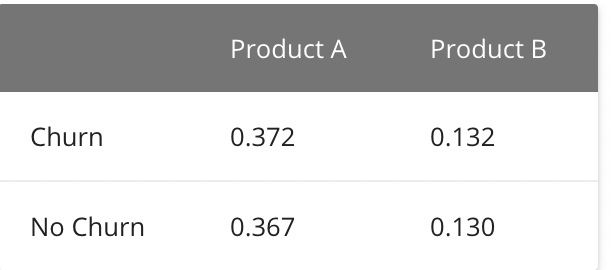

Then we can also see the actual expected number:

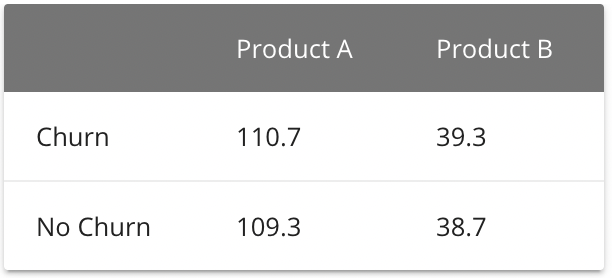

4. Calculate the test statistic and compute a p-value

In [22]:
index = ['Churn', 'No Churn']
columns = ['Product A', 'Product B']

observed = pd.DataFrame([[100, 50], [120, 28]], index=index, columns=columns)
n = observed.values.sum()

expected = pd.DataFrame([[.372, .132], [.367, .130]], index=index, columns=columns) * n

chi2 = ((observed - expected)**2 / expected).values.sum()

nrows, ncols = observed.shape

degrees_of_freedom = (nrows - 1) * (ncols - 1)

p = stats.chi2(degrees_of_freedom).sf(chi2)

print('Observed')
print(observed)
print('---\nExpected')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
          Product A  Product B
Churn           100         50
No Churn        120         28
---
Expected
          Product A  Product B
Churn       110.856     39.336
No Churn    109.366     38.740
---

chi^2 = 7.9656
p     = 0.0048


# The Easy Way to Do the Above Cell
We can also give our observed values to the chi2_contingency function from scipy's stats module to make all the calculations for us.

In [23]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[100  50]
 [120  28]]
---
Expected

[[110.73825503  39.26174497]
 [109.26174497  38.73825503]]
---

chi^2 = 7.2817
p     = 0.0070


Note that this function will return not just the χ2 test statistic and p-value, but also the degrees of freedom, and a matrix of expected values.